In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Data Preprocessing**

In [ ]:
#shape of the dataset
df.shape

(768, 9)

Memeriksa nilai unik untuk setiap variabel dalam kumpulan data

In [ ]:
#checking unique values
variables = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
for i in variables:
    print(df[i].unique())

[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
[  0  94 168  88 543 846 175 230  83  96 235 

Dalam kumpulan data, variabel kecuali Kehamilan dan Hasil Tidak boleh bernilai 0, karena tidak mungkin memiliki Kadar Glukosa 0 atau Tekanan Darah 0. Jadi, ini akan dianggap sebagai informasi yang salah


Memeriksa hitungan nilai 0 pada variabel

In [ ]:
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',]
for i in variables:
    c = 0
    for x in (df[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


Mengganti nilai 0 pada variabel - Glukosa, Tekanan Darah, Ketebalan Kulit, Insulin, BMI

In [ ]:
#replacing the missing values with the mean
variables = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in variables:
    df[i].replace(0,df[i].mean(),inplace=True)

In [ ]:
#checking to make sure that incorrect values are replace
for i in variables:
    c = 0
    for x in (df[i]):
        if x == 0:
            c = c + 1
    print(i,c)

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


Checking for missing values

In [ ]:
#missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
#checking descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


**Exploratory Data Analysis**

Dalam analisis data eksplorasi, akan melihat sebaran data, korelasi antar fitur, dan hubungan antara fitur dan variabel target. dimulai dengan melihat sebaran datanya, dilanjutkan dengan hubungan antara variabel target dan variabel independen.

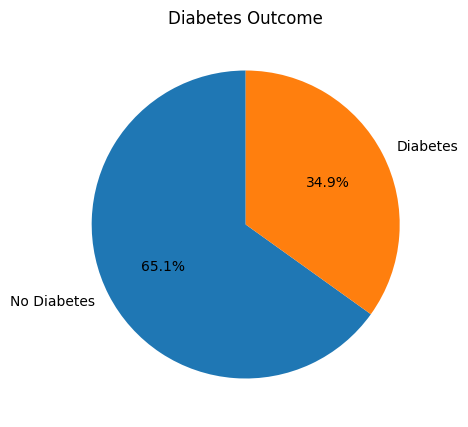

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Diabetes Outcome')
plt.show()

Age Distribution and Diabetes

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


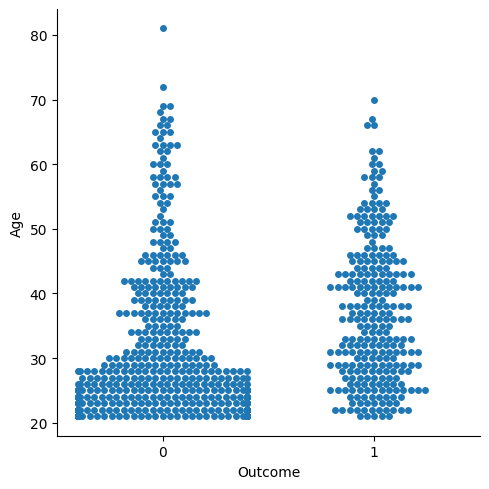

In [ ]:
sns.catplot(x="Outcome", y="Age", kind="swarm", data=df)

Dari grafik tersebut terlihat bahwa mayoritas penderitanya adalah orang dewasa dengan rentang usia 20-30 tahun. Penderita pada rentang usia 40-55 tahun lebih rentan terkena diabetes dibandingkan kelompok usia lainnya. Karena jumlah orang dewasa pada kelompok umur 20-30 tahun lebih banyak, maka jumlah penderita diabetes juga lebih banyak dibandingkan kelompok umur lainnya.

Pregnancies and Diabetes

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

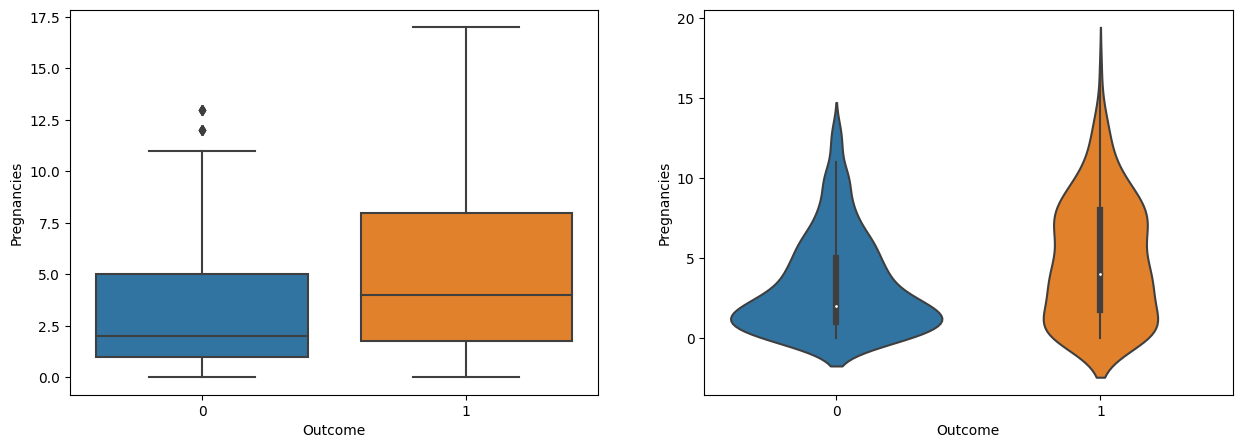

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=ax[0])
sns.violinplot(x='Outcome',y='Pregnancies',data=df,ax=ax[1])

Boxplot dan violinplot menunjukkan hubungan yang aneh antara jumlah kehamilan dan diabetes. Berdasarkan grafik, peningkatan jumlah kehamilan menunjukkan peningkatan risiko diabetes.


Blood Pressuse and Diabetes

Text(0.5, 1.0, 'BloodPressure vs Diabetes')

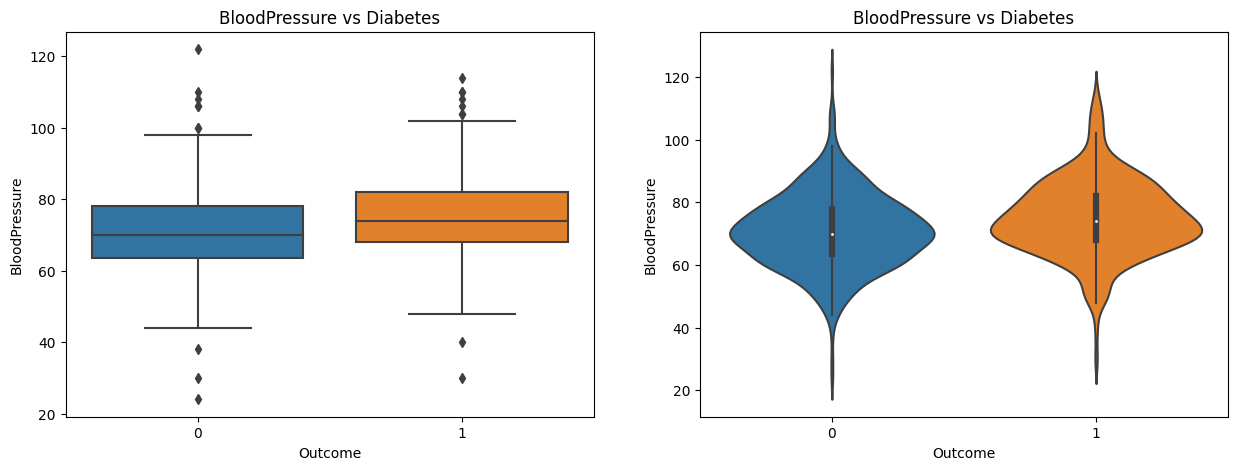

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='BloodPressure', data=df, ax=ax[0]).set_title('BloodPressure vs Diabetes')
sns.violinplot(x='Outcome', y='BloodPressure', data=df, ax=ax[1]).set_title('BloodPressure vs Diabetes')

Boxplot dan voilinplot memberikan pemahaman yang jelas tentang hubungan antara tekanan darah dan diabetes. Boxplot menunjukkan bahwa median tekanan darah pasien diabetes sedikit lebih tinggi dibandingkan pasien non-diabetes. Plot voilin menunjukkan bahwa distribusi tekanan darah pada pasien diabetes sedikit lebih tinggi dibandingkan pasien non-diabetes. Namun belum ada cukup bukti untuk menyimpulkan bahwa tekanan darah merupakan prediktor diabetes yang baik.

Skin Thickness and Diabetes

Text(0.5, 1.0, 'SkinThickness vs Diabetes')

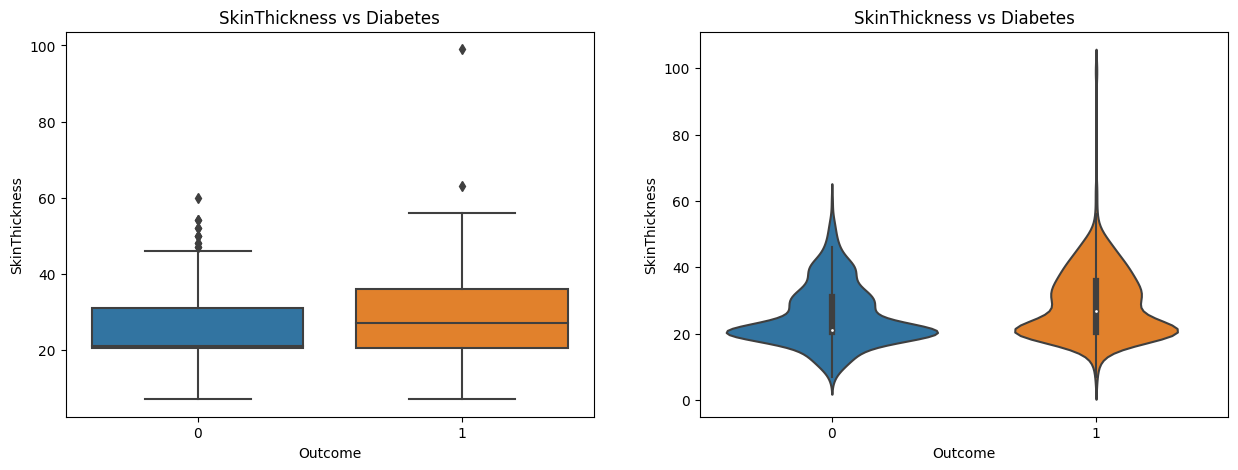

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome', y='SkinThickness', data=df,ax=ax[0]).set_title('SkinThickness vs Diabetes')
sns.violinplot(x='Outcome', y='SkinThickness', data=df,ax=ax[1]).set_title('SkinThickness vs Diabetes')


Baik boxplot maupun violinplot mengungkapkan pengaruh diabetes terhadap ketebalan kulit. Seperti yang diamati pada boxplot, median ketebalan kulit lebih tinggi pada pasien diabetes dibandingkan pasien non-diabetes, di mana pasien non-diabetes memiliki median ketebalan kulit mendekati 20 dibandingkan dengan ketebalan kulit mendekati 30 pada pasien diabetes. Violinplot menunjukkan distribusi ketebalan kulit pasien, di mana yang non-diabetes memiliki distribusi lebih besar mendekati 20 dan diabetes jauh lebih sedikit distribusi mendekati 20 dan peningkatan distribusi mendekati 30. Oleh karena itu, ketebalan kulit dapat menjadi indikator diabetes.

Insulin and Diabetes

Text(0.5, 1.0, 'Insulin vs Diabetes')

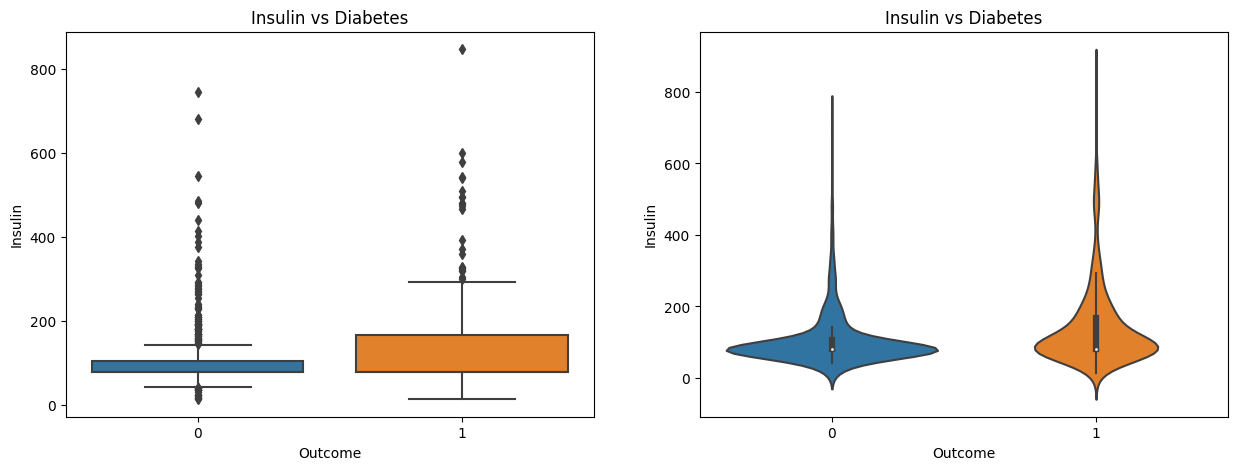

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='Insulin',data=df,ax=ax[0]).set_title('Insulin vs Diabetes')
sns.violinplot(x='Outcome',y='Insulin',data=df,ax=ax[1]).set_title('Insulin vs Diabetes')


Insulin adalah hormon tubuh utama yang mengatur metabolisme glukosa. Insulin dibutuhkan tubuh untuk efisien menggunakan gula, lemak, dan protein. Setiap perubahan jumlah insulin dalam tubuh akan memengaruhi kadar glukosa juga.

Disini, boxplot dan violinplot menunjukkan distribusi kadar insulin pada pasien. Pada pasien non-diabetes, kadar insulin mendekati 100, sedangkan pada pasien diabetes mendekati 200. Violinplot memperlihatkan bahwa distribusi kadar insulin pada pasien non-diabetes lebih menyebar sekitar 100, sedangkan pada pasien diabetes lebih terpusat dan sedikit menyebar pada kadar insulin yang lebih tinggi.Hal ini menunjukkan bahwa kadar insulin merupakan indikator diabetes yang baik.

BMI and Diabetes

<Axes: xlabel='Outcome', ylabel='BMI'>

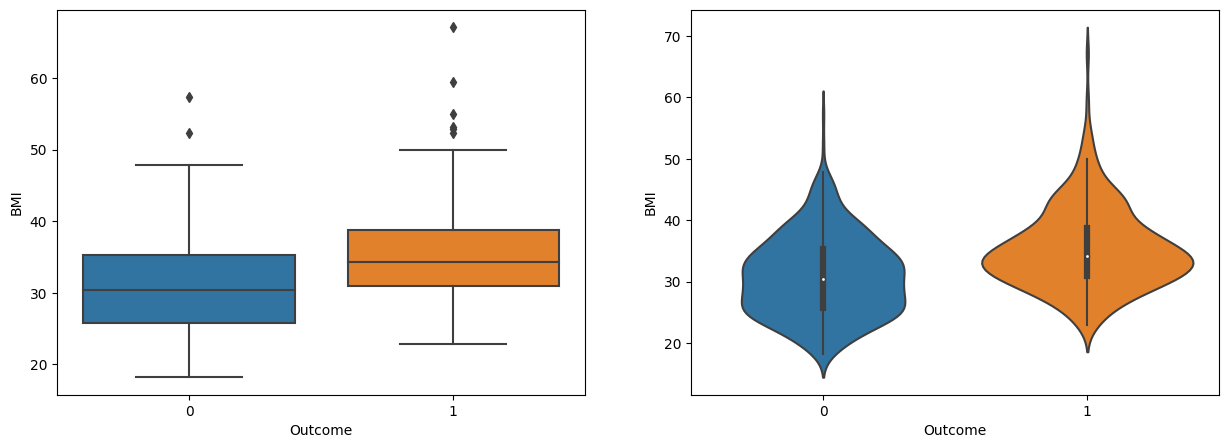

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='BMI',data=df,ax=ax[0])
sns.violinplot(x='Outcome',y='BMI',data=df,ax=ax[1])

Kedua grafik tersebut menyoroti peran BMI dalam prediksi diabetes. Pasien non diabetes memiliki BMI normal dalam kisaran 25-35 sedangkan pasien diabetes memiliki BMI lebih besar dari 35. Biolaplot mengungkapkan distribusi BMI, dimana pasien non diabetes memiliki peningkatan penyebaran dari 25 menjadi 35 dan menyempit setelah 35. Namun pada pasien diabetes terjadi peningkatan spread sebesar 35 dan peningkatan spread 45-50 dibandingkan dengan pasien non diabetes. Oleh karena itu BMI merupakan prediktor diabetes yang baik dan orang yang mengalami obesitas lebih besar kemungkinannya terkena diabetes.

Diabetes Pedigree Function and Diabetes Outcome

Text(0.5, 1.0, 'Diabetes Pedigree Function')

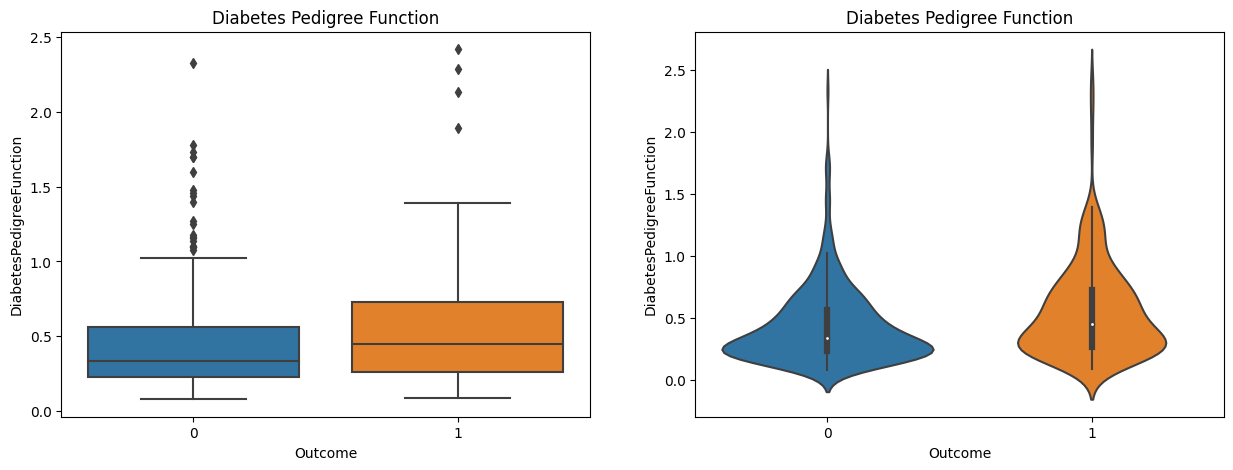

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,ax=ax[0]).set_title('Diabetes Pedigree Function')
sns.violinplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,ax=ax[1]).set_title('Diabetes Pedigree Function')

Diabetes Pedigree Function (DPF) menghitung kemungkinan diabetes tergantung pada usia dan riwayat diabetes keluarga. Dari boxplot, pasien dengan DPF yang lebih rendah, jauh lebih kecil kemungkinannya untuk menderita diabetes. Pasien dengan DPF yang lebih tinggi, jauh lebih mungkin menderita diabetes. Pada violinplot, mayoritas pasien non diabetes memiliki DPF 0.25-0.35, sedangkan pasien diabetes memiliki DPF yang lebih tinggi, yang ditunjukkan oleh distribusi mereka di violinplot dimana terdapat peningkatan penyebaran DPF dari 0.5 -1.5. Oleh karena itu, DPF merupakan indikator yang baik untuk diabetes.

Coorelation Matrix Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

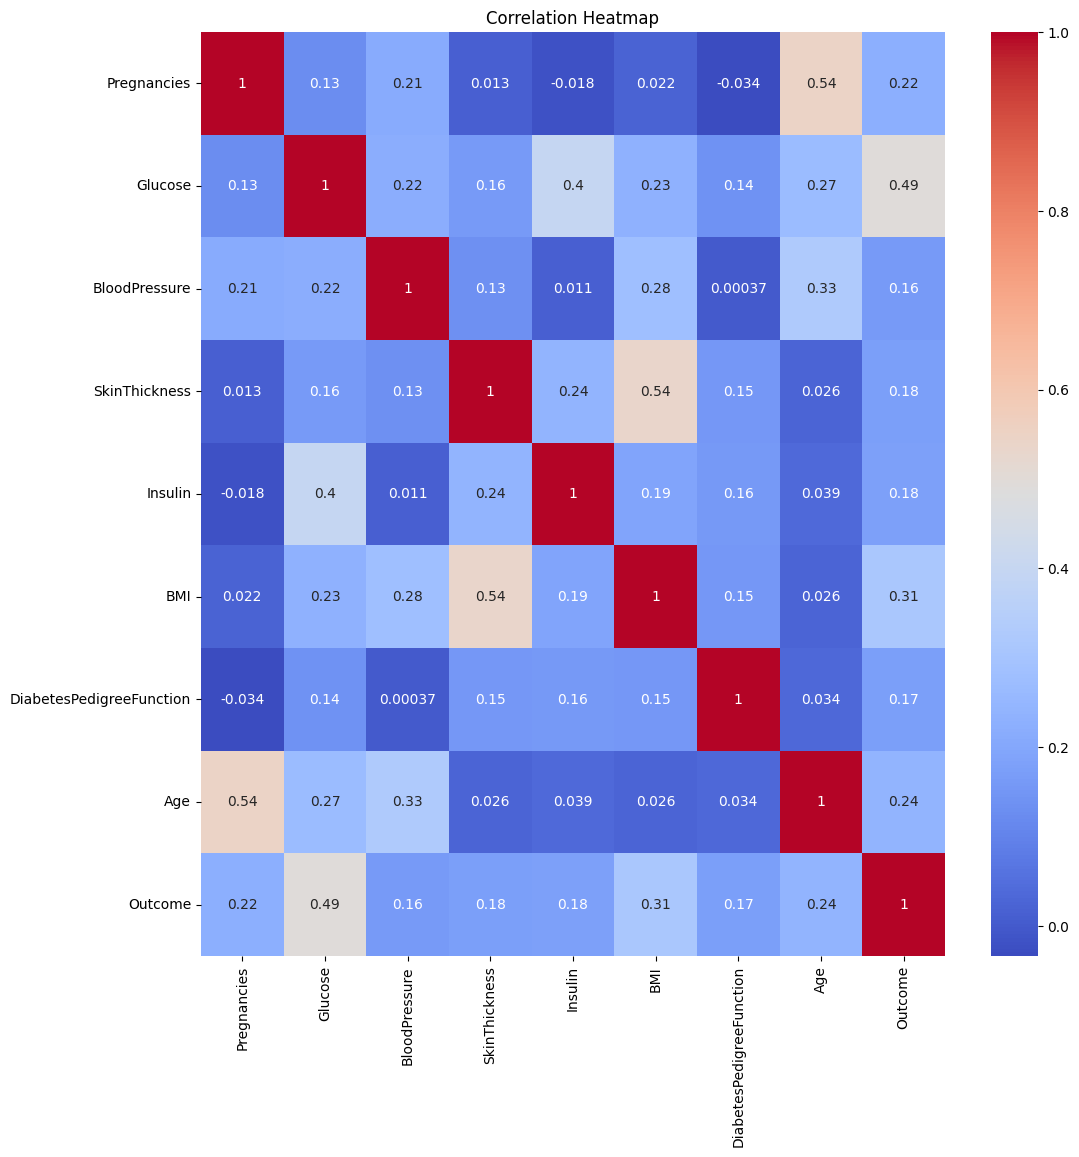

In [ ]:
#correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm').set_title('Correlation Heatmap')

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=42)

**Diabetes Prediction**

Untuk memprediksi diabetes, saya akan menggunakan algoritma berikut:
1.   Logistic Regression
2.   Random Forest Classifier
3.   Support Vector Machine

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

#training the model
lr.fit(X_train,y_train)
#training accuracy
lr.score(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7719869706840391

In [ ]:
#predicted outcomes
lr_pred = lr.predict(X_test)

**Random Forest Classifier**

In [ ]:
#buidling model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc

#training model
rfc.fit(X_train, y_train)
#training accuracy
rfc.score(X_train, y_train)

1.0

In [ ]:
#predicted outcomes
rfc_pred = rfc.predict(X_test)

**Support Vector Machine (SVM)**

In [ ]:
#building model
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=0)
svm
#training the model
svm.fit(X_train, y_train)
#training the model
svm.score(X_test, y_test)

0.7597402597402597

In [ ]:
#predicting outcomes
svm_pred = svm.predict(X_test)

**Model Evaluation**

**Evaluating Logistic Regression Model**

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



Model ini memiliki skor f1 rata-rata 0,76 dan akurasi 78%.

In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
print('Accuracy Score: ',accuracy_score(y_test,lr_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,lr_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,lr_pred))
print('R2 Score: ',r2_score(y_test,lr_pred))

Accuracy Score:  0.7792207792207793
Mean Absolute Error:  0.22077922077922077
Mean Squared Error:  0.22077922077922077
R2 Score:  0.038383838383838076


**Evaluating Random Forest Classifier**

Classification Report

In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Model ini memiliki nilai f1 rata-rata sebesar 0,75 dan akurasi sebesar 77% yang lebih rendah dibandingkan dengan Logistic Regression model.

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,rfc_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,rfc_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,rfc_pred))
print('R2 Score: ',r2_score(y_test,rfc_pred))

Accuracy Score:  0.7662337662337663
Mean Absolute Error:  0.23376623376623376
Mean Squared Error:  0.23376623376623376
R2 Score:  -0.01818181818181852


**Evaluating SVM Model**

Classification Report

In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Model ini memiliki nilai f1 rata-rata sebesar 0,75 dan akurasi 77% yang setara dengan model sebelumnya yaitu Random Forest.

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,svm_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,svm_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,svm_pred))
print('R2 Score: ',r2_score(y_test,svm_pred))

Accuracy Score:  0.7597402597402597
Mean Absolute Error:  0.24025974025974026
Mean Squared Error:  0.24025974025974026
R2 Score:  -0.046464646464646764


**Comparing the models**

Text(0.5, 1.0, 'Comparison of different models')

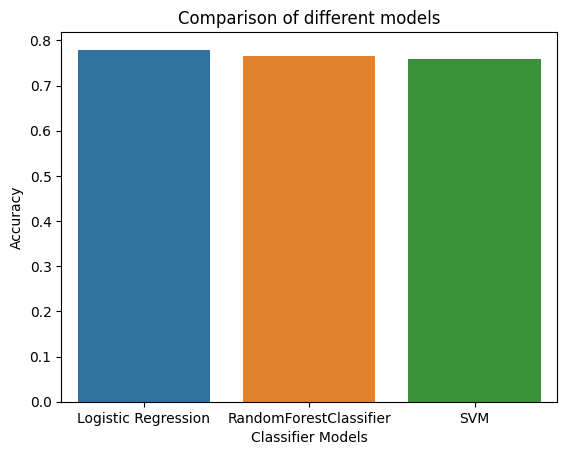

In [ ]:
#comparing the accuracy of different models
sns.barplot(x=['Logistic Regression', 'RandomForestClassifier', 'SVM'], y=[0.7792207792207793,0.7662337662337663,0.7597402597402597])
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

**Conclusion**

Dari analisis data eksplorasi, saya menyimpulkan bahwa risiko diabetes bergantung pada faktor-faktor berikut:
1. Tingkat glukosa
2. Jumlah kehamilan
3. Ketebalan kulit
4. Tingkat insulin
5. BMI

Dengan meningkatnya kadar glukosa, kadar insulin, BMI dan jumlah kehamilan, risiko diabetes meningkat. Namun, jumlah kehamilan memiliki efek yang aneh terhadap risiko diabetes yang tidak dapat dijelaskan oleh data. Risiko diabetes juga meningkat seiring dengan peningkatan ketebalan kulit.

Untuk model klasifikasi, Regresi Logistik mengungguli Random Forest dan SVM dengan akurasi 78%.